In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
%matplotlib inline

/home/eolson/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/eolson/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Temperature Response - Phyto Growth

In [2]:
T=np.arange(-5,100,.1)

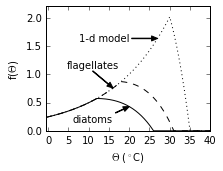

In [3]:
#R3: match Khangaonkar max temps for diatoms (12 C) and dinoflagellates (18 C):
fig,ax=plt.subplots(1,1,figsize=(3,2.3))
tr1=14 # 12 C
tr2=13 # 18 C
tm1=26 
tm2=31
R=[1.0*np.exp(0.07 * (TT - 20)) * min(max((35 - TT), 0.0),5) / (5) for TT in T]
R3_1=[1.0*np.exp(0.07 * (TT - 20)) * min(max((tm1 - TT), 0.0),tr1) / (tr1) for TT in T]
R3_2=[1.0*np.exp(0.07 * (TT - 20)) * min(max((tm2 - TT), 0.0),tr2) / (tr2) for TT in T]
ax.plot(T,R,'k:',label='1-d model')
ax.plot(T,R3_1,'k-',label='diatoms')
ax.plot(T,R3_2,'k--',label='flagellates')
#plt.legend()
ii1=np.argmax(R3_1)
ii2=np.argmax(R3_2)
#print(T[ii1],T[ii2])
ax.set_ylabel('f($\Theta$)')
ax.set_xlabel('$\Theta$ ($^\circ$C)')
ax.set_xlim(-.5,40)
ax.set_ylim(0,2.2)
disx=27
# 1d annot:
disy=1.0*np.exp(0.07 * (disx - 20)) * min(max((35 - disx), 0.0),5) / 5
ax.annotate('1-d model', xy=(disx, disy), xytext=(disx-7, disy),color='k',
            arrowprops=dict(color='k',width=.5,headwidth=5,headlength=6),fontsize=10,
             horizontalalignment='right',verticalalignment='center')
# flagellates annot:
disx=16
disy=1.0*np.exp(0.07 * (disx - 20)) * min(max((tm2 - disx), 0.0),tr2) / (tr2)
ax.annotate('', xy=(disx, disy), xytext=(disx-5, disy+.3),color='k',
             horizontalalignment='center',verticalalignment='center',
            arrowprops=dict(color='k',width=.5,headwidth=5,headlength=6),fontsize=12)
ax.annotate('flagellates', xy=(disx-5, disy+.4), xytext=(disx-5, disy+.4),color='k',
             horizontalalignment='center',verticalalignment='center',fontsize=10)
# diatoms annot:
disx=20
disy=1.0*np.exp(0.07 * (disx - 20)) * min(max((tm1 - disx), 0.0),tr1) / tr1
ax.annotate('diatoms', xy=(disx, disy), xytext=(disx-4, disy-.22),color='k',
            arrowprops=dict(color='k',width=.5,headwidth=5,headlength=6),fontsize=10,
             horizontalalignment='right',verticalalignment='center')
l, b, w, h = ax.get_position().bounds
ax.set_position([l+.08*w, b+.08*h, w*.98, h*.97])
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/Tdep.eps',dpi=200,transparent=True)